In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as pli
import numpy as np
from scipy import ndimage as ndi


In [2]:
covid = pli.imread("1covid.png")
normal = pli.imread("2normal.png")
pneu = pli.imread("3pneumonia.png")

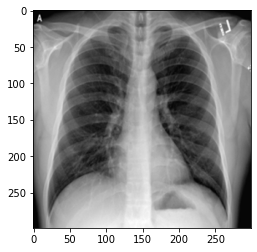

In [3]:
plt.imshow(covid, cmap="gray")

In [4]:
print(covid.shape," ", normal.shape, " ", pneu.shape)

(299, 299)   (299, 299)   (299, 299)


In [5]:
covid_pixels = covid.flatten()
normal_pixels = normal.flatten()
pneu_pixels = pneu.flatten()

In [6]:
# max iteration 100, score 85%
retval, labels, centers = cv2.kmeans(covid_pixels, 2, None, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.90), 10, cv2.KMEANS_PP_CENTERS)
if (centers[0,0]>centers[1,0]):
    centers[0,0],centers[1,0] = centers[1,0],centers[0,0]
    labels = 1-labels

In [7]:
covid_segment = np.array(labels.reshape(covid.shape))

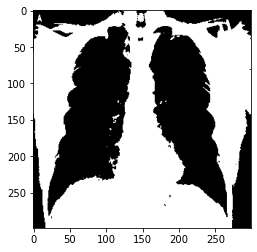

In [8]:
plt.imshow(covid_segment, cmap="gray")

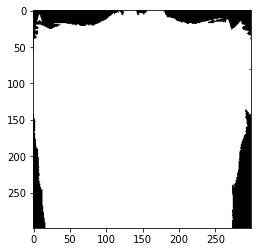

In [9]:
fill_lungs = np.array(ndi.binary_fill_holes(covid_segment), dtype=int )
plt.imshow(fill_lungs, cmap="gray")

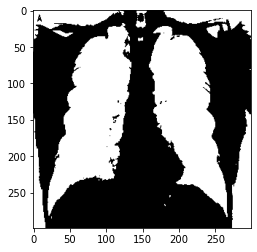

In [10]:
covid_segment_not = cv2.bitwise_not(covid_segment)
plt.imshow(covid_segment_not, cmap="gray")

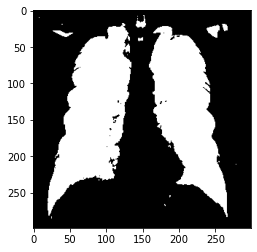

In [11]:
covid_gabung = cv2.bitwise_and(covid_segment_not, fill_lungs)
plt.imshow(covid_gabung, cmap="gray")

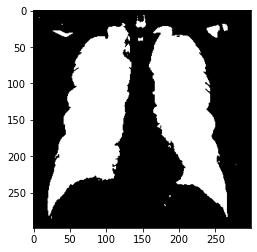

In [12]:
mask = np.array(ndi.binary_fill_holes(covid_gabung), dtype=int )
plt.imshow(mask, cmap="gray")

In [13]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
covid

array([[0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
        0.02352941],
       [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
        0.02352941],
       [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
        0.02352941],
       ...,
       [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
        0.02352941],
       [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
        0.02352941],
       [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
        0.02352941]], dtype=float32)

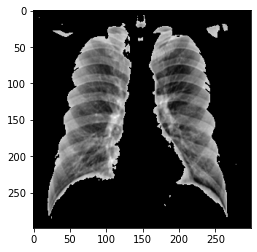

In [15]:
result = (covid * mask)
plt.imshow(result, cmap="gray")